In [1]:
import pandas as pd
import numpy as np
import requests
import json
import math
import seaborn as sns
from matplotlib import pyplot as plt
import time
import glob
from pathlib import Path
import re

In [10]:
df = pd.read_csv(r'C:\Users\majac\Desktop\Projects\Real-estate-israel\nadlan_train1.csv')
df.drop(columns = 'Unnamed: 0', inplace=True)

C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='surface area', ylabel='Density'>

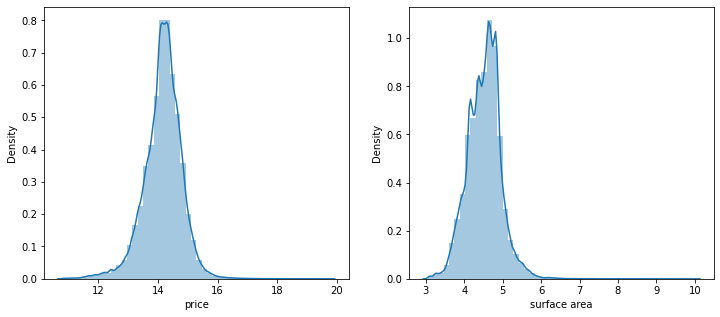

In [11]:
df_cop1 = df.copy()
df_cop1['price'] = np.log1p(df_cop1['price'])
df_cop1['surface area'] = np.log1p(df_cop1['surface area'])
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.distplot(df_cop1['price'], ax=axes[0])
sns.distplot(df_cop1['surface area'], ax=axes[1])

<AxesSubplot:>

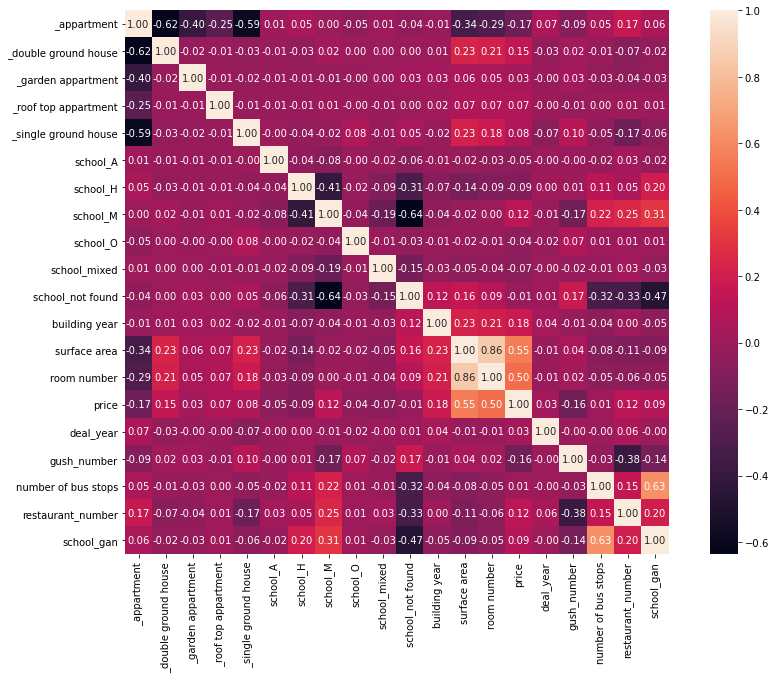

In [12]:
plt.figure(figsize= (15,10))
sns.heatmap(df_cop1.corr(), square=True, fmt = '.2f', annot = True)

In [13]:
df_cop1.corr()['price'].apply(abs).sort_values(ascending=False)


price                   1.000000
surface area            0.552756
room number             0.499611
building year           0.179677
_appartment             0.172832
gush_number             0.157488
_double ground house    0.146202
restaurant_number       0.123737
school_M                0.119692
school_gan              0.092380
school_H                0.089102
_single ground house    0.077926
school_mixed            0.069540
_roof top appartment    0.066972
school_A                0.049459
school_O                0.044109
deal_year               0.029356
_garden appartment      0.027917
school_not found        0.013599
number of bus stops     0.005861
Name: price, dtype: float64

In [16]:
df_2020 = df_cop1.loc[df_cop1['deal_year']==2020]
df_2020.shape

(39585, 20)

In [19]:
X = df_cop1.drop(columns = 'price')
y = df_cop1[['price']]

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=66)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_s = sc_x.fit_transform(X_train)
X_test_s = sc_x.transform(X_test)




In [20]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators= 300, max_depth= 20)
               
clf.fit(X_train, y_train)
score_pred = clf.score(X_test, y_test)
score_train = clf.score(X_train, y_train)
print('The score of the prediction is {} \nThe score of the training set is {}'.format(score_pred, score_train))

C:\Users\majac\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


The score of the prediction is 0.7607121524518365 
The score of the training set is 0.931768678674072
